In [50]:
import pandas as pd

In [51]:
customers_path = 'Customers.csv'
products_path = 'Products.csv'
transactions_path = 'Transactions.csv'

In [52]:
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

In [53]:
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [54]:
customers_head=customers_df.head()
products_head=products_df.head()
transactions_head=transactions_df.head()

In [55]:
customers_info,products_info,transactions_info,customers_head,products_head,transactions_head

(None,
 None,
 None,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  20

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Convert dates to datetime format for EDA
customers_df['SignupDate']=pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate']=pd.to_datetime(transactions_df['TransactionDate'])

In [58]:
# Basic statistics
customers_summary=customers_df.describe(include='all')
products_summary=products_df.describe(include='all')
transactions_summary=transactions_df.describe(include='all')

In [59]:
# Insight 1: Transactions over time
# Convert transaction dates to month periods
transactions_df['TransactionMonth']=transactions_df['TransactionDate'].dt.to_period('M')
transactions_monthly=transactions_df.groupby('TransactionMonth').size()

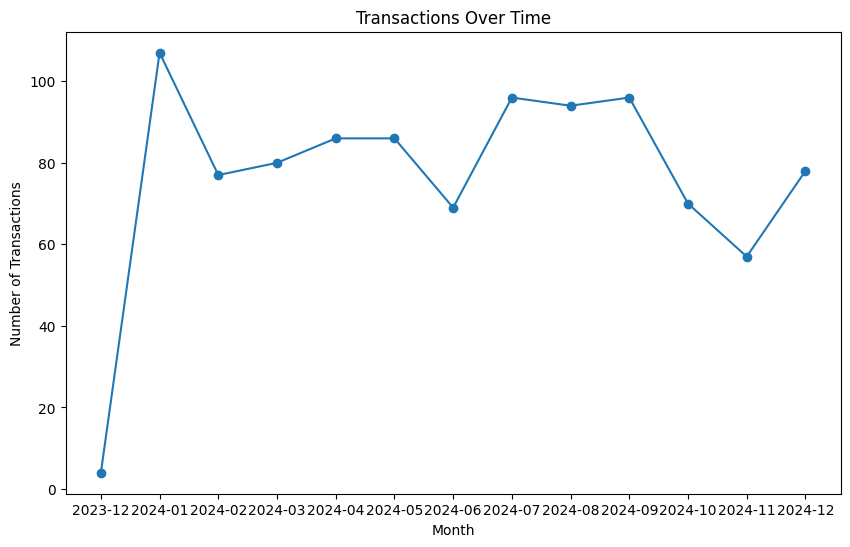

In [60]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(transactions_monthly.index.astype(str),transactions_monthly.values,marker='o')
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

In [61]:
# Insight 2: Top products by sales value
# Calculate top products by sales value
top_products=transactions_df.groupby('ProductID')['TotalValue'].sum().nlargest(5).reset_index()
top_products=pd.merge(top_products, products_df, on='ProductID', how='left')

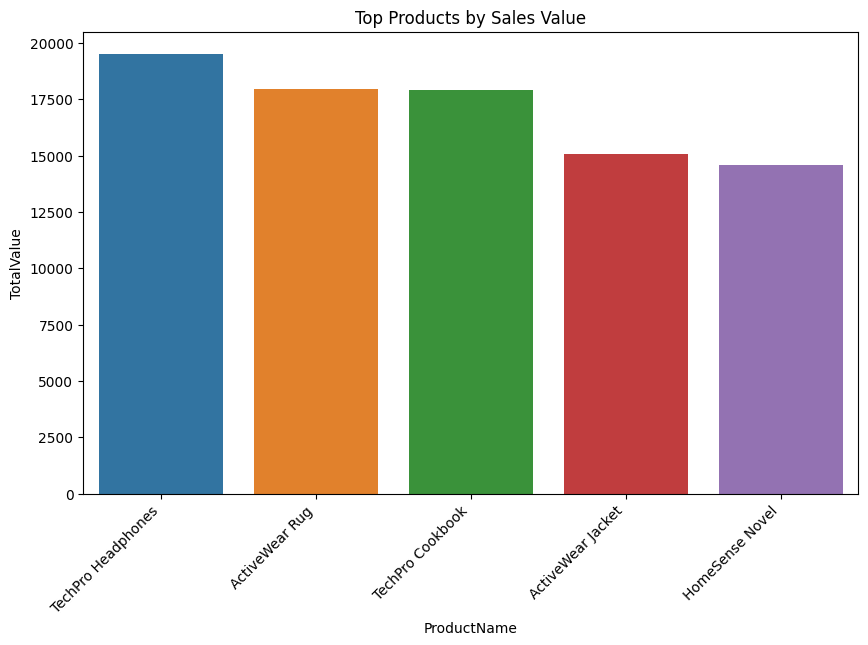

In [62]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products,x='ProductName',y='TotalValue')
plt.title("Top Products by Sales Value")
plt.xticks(rotation=45,ha='right')
plt.show()

In [63]:
# Insight 3: Top customers by total purchase value
# Calculate top customers by total purchase value
top_customers=transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5).reset_index()
top_customers=pd.merge(top_customers,customers_df,on='CustomerID',how='left')

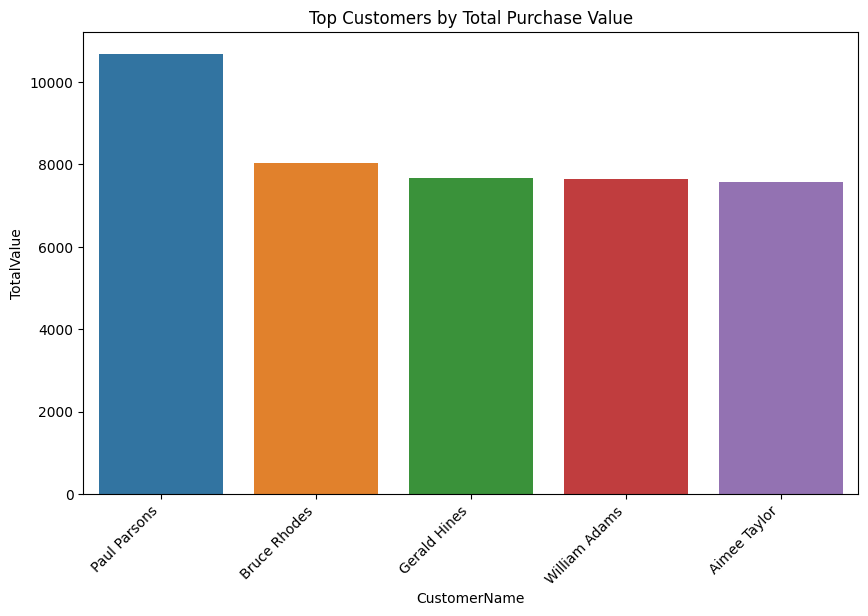

In [64]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers,x='CustomerName',y='TotalValue')
plt.title("Top Customers by Total Purchase Value")
plt.xticks(rotation=45,ha='right')
plt.show()

In [65]:
# Insight 4: Distribution of product prices
# Extract price distribution
price_distribution=products_df['Price']

C:\Users\kaniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


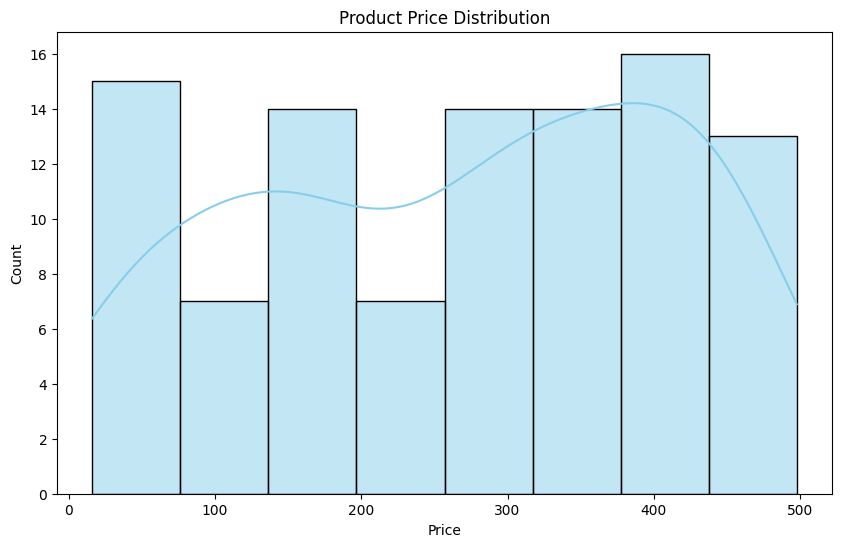

In [66]:
# Visualization
plt.figure(figsize=(10,6))
sns.histplot(price_distribution, kde=True, color='skyblue')
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.show()


In [67]:
# Insight 5: Transactions by region
# Merge transactions with customer regions
transactions_with_region=pd.merge(transactions_df, customers_df[['CustomerID', 'Region']],on='CustomerID',how='left')
transactions_by_region=transactions_with_region.groupby('Region').size()

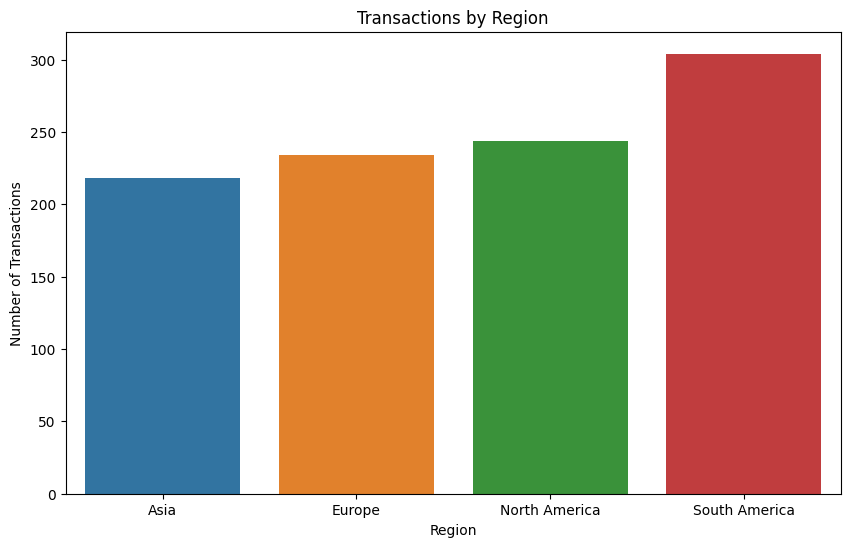

In [68]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=transactions_by_region.index,y=transactions_by_region.values)
plt.title("Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.show()


C:\Users\kaniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


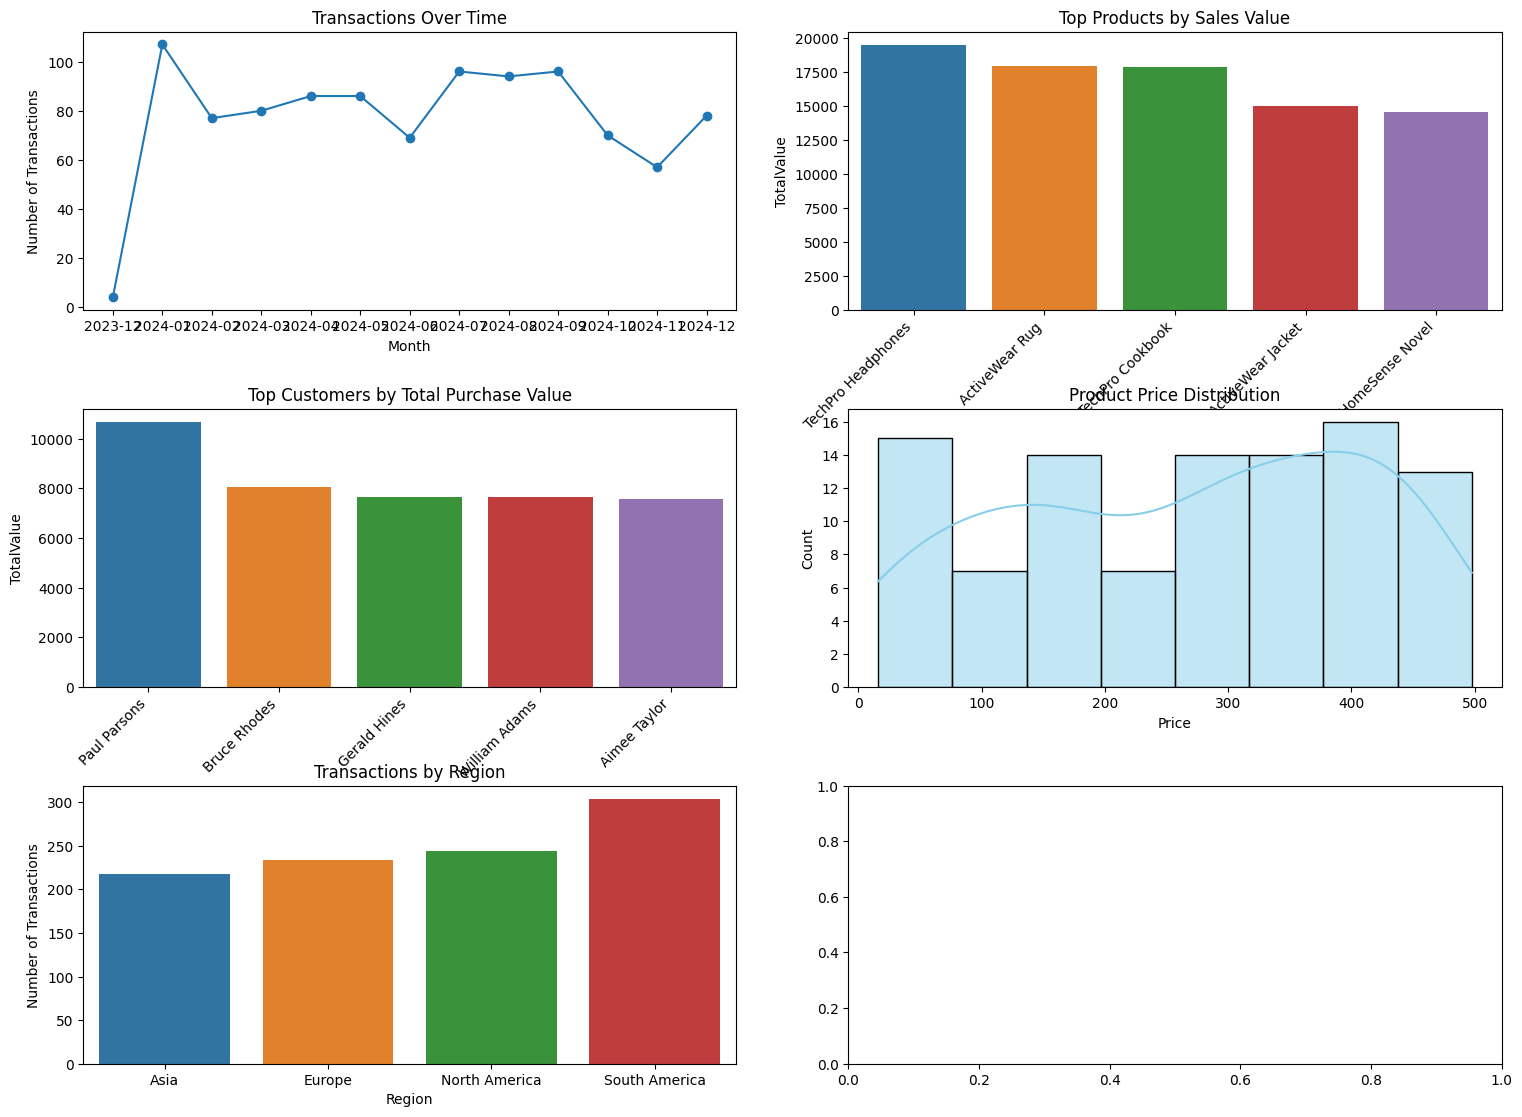

(       CustomerID      CustomerName         Region           SignupDate
 count         200               200            200                  200
 unique        200               200              4                  NaN
 top         C0001  Lawrence Carroll  South America                  NaN
 freq            1                 1             59                  NaN
 mean          NaN               NaN            NaN  2023-07-19 08:31:12
 min           NaN               NaN            NaN  2022-01-22 00:00:00
 25%           NaN               NaN            NaN  2022-09-26 12:00:00
 50%           NaN               NaN            NaN  2023-08-31 12:00:00
 75%           NaN               NaN            NaN  2024-04-12 12:00:00
 max           NaN               NaN            NaN  2024-12-28 00:00:00,
        ProductID            ProductName Category       Price
 count        100                    100      100  100.000000
 unique       100                     66        4         NaN
 top      

In [69]:
# overall
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates to datetime format for EDA
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Basic statistics
customers_summary = customers_df.describe(include='all')
products_summary = products_df.describe(include='all')
transactions_summary = transactions_df.describe(include='all')

# Insight 1: Transactions over time
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transactions_monthly = transactions_df.groupby('TransactionMonth').size()

# Insight 2: Top products by sales value
top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().nlargest(5).reset_index()
top_products = pd.merge(top_products, products_df, on='ProductID', how='left')

# Insight 3: Top customers by total purchase value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5).reset_index()
top_customers = pd.merge(top_customers, customers_df, on='CustomerID', how='left')

# Insight 4: Distribution of product prices
price_distribution = products_df['Price']

# Insight 5: Transactions by region
transactions_with_region = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')
transactions_by_region = transactions_with_region.groupby('Region').size()

# Visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.tight_layout(pad=5.0)

# Transactions over time
axes[0, 0].plot(transactions_monthly.index.astype(str), transactions_monthly.values, marker='o')
axes[0, 0].set_title("Transactions Over Time")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Number of Transactions")

# Top products by sales value
sns.barplot(data=top_products, x='ProductName', y='TotalValue', ax=axes[0, 1])
axes[0, 1].set_title("Top Products by Sales Value")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Top customers by total purchase value
sns.barplot(data=top_customers, x='CustomerName', y='TotalValue', ax=axes[1, 0])
axes[1, 0].set_title("Top Customers by Total Purchase Value")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Product price distribution
sns.histplot(price_distribution, kde=True, ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title("Product Price Distribution")
axes[1, 1].set_xlabel("Price")

# Transactions by region
sns.barplot(x=transactions_by_region.index, y=transactions_by_region.values, ax=axes[2, 0])
axes[2, 0].set_title("Transactions by Region")
axes[2, 0].set_xlabel("Region")
axes[2, 0].set_ylabel("Number of Transactions")

plt.show()

customers_summary, products_summary, transactions_summary
